In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel('xls/Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)

df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


### Pie Charts

**Question:** Explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013

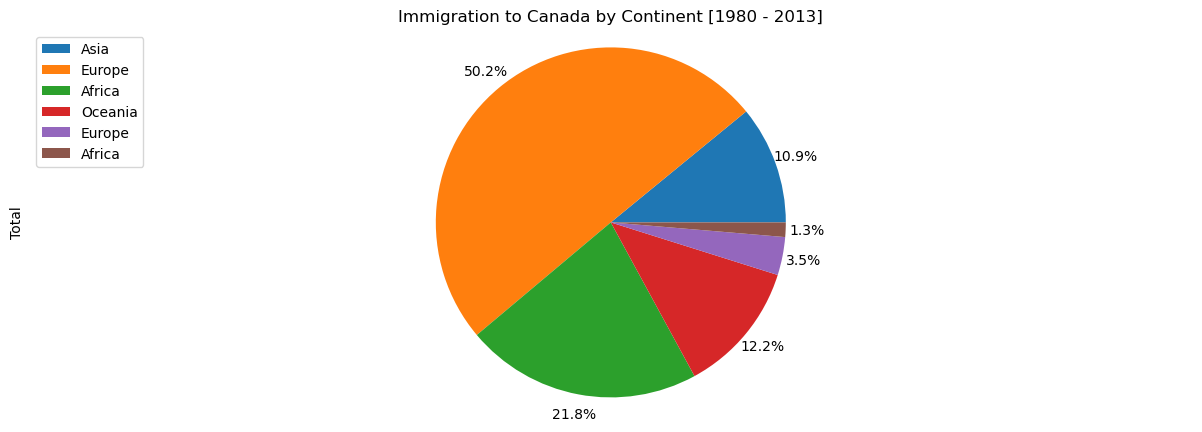

In [205]:
df_pie = df.copy()

df_pie['Total'] = df_pie.sum(numeric_only=True, axis=1)

df_pie.groupby(['AreaName'])['Total'].sum().plot(kind='pie'
                                                 ,autopct='%1.1f%%'
                                                 ,labels=None     # turn off labels on pie chart
                                                 ,pctdistance=1.12   # the ratio between the center of each pie slice and the start of the text generated by autopct 
                                                 ,figsize=(15,5))

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.legend(labels=df_pie['AreaName'], loc='upper left') 
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

**Question:** Using a pie chart, explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

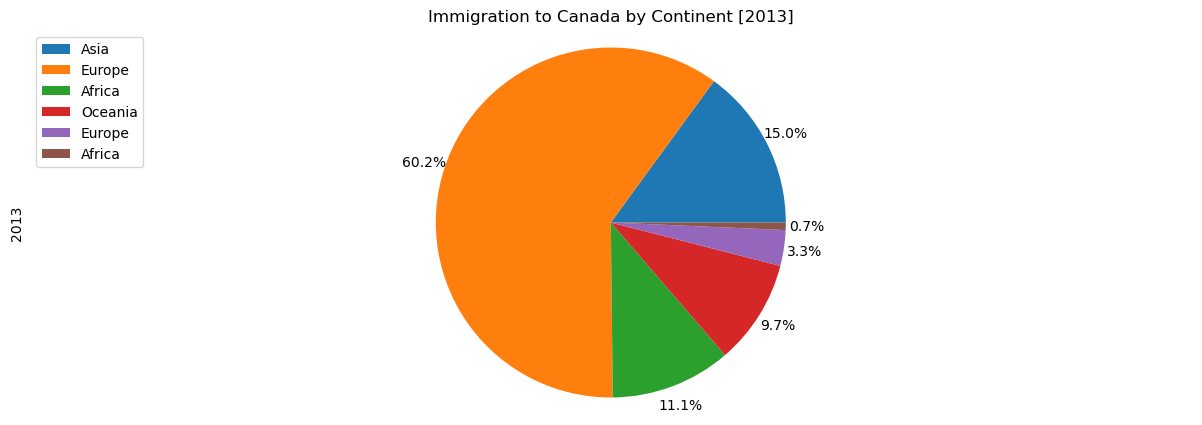

In [206]:
df_pie_new = df.copy()

df_pie_new.groupby(['AreaName'])[2013].sum().plot(kind='pie'
                                                 ,autopct='%1.1f%%'
                                                 ,labels=None     # turn off labels on pie chart
                                                 ,pctdistance=1.12   # the ratio between the center of each pie slice and the start of the text generated by autopct 
                                                 ,figsize=(15,5))

plt.title('Immigration to Canada by Continent [2013]')
plt.legend(labels=df_pie['AreaName'], loc='upper left') 
plt.axis('equal') # Sets the pie chart to look like a circle.
plt.show()

### Box Plots
**Question:** Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

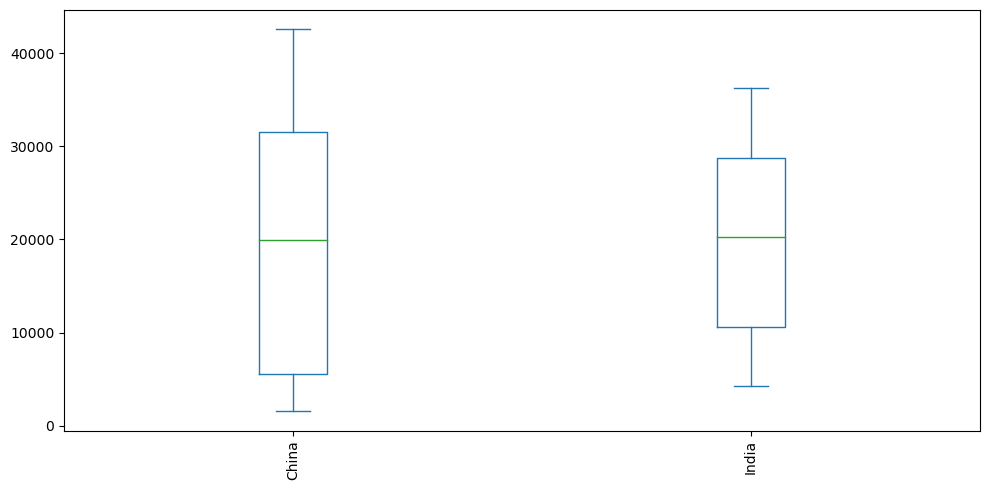

In [207]:
df_box = df.copy()

df_box.drop(columns=['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'],inplace=True)

df_box = df_box[df_box['OdName'].isin(['China','India'])]

df_box.set_index('OdName',inplace=True)

df_box.transpose().plot(kind='box',rot=90, figsize=(10,5))

plt.tight_layout()

plt.show()

In [208]:
df_box.transpose().describe()

OdName,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


### Subplots


In [209]:
df_subplot = df.copy()

df_subplot.drop(columns=['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'],inplace=True)

df_subplot.set_index('OdName',inplace=True)

df_subplot.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
OdName,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


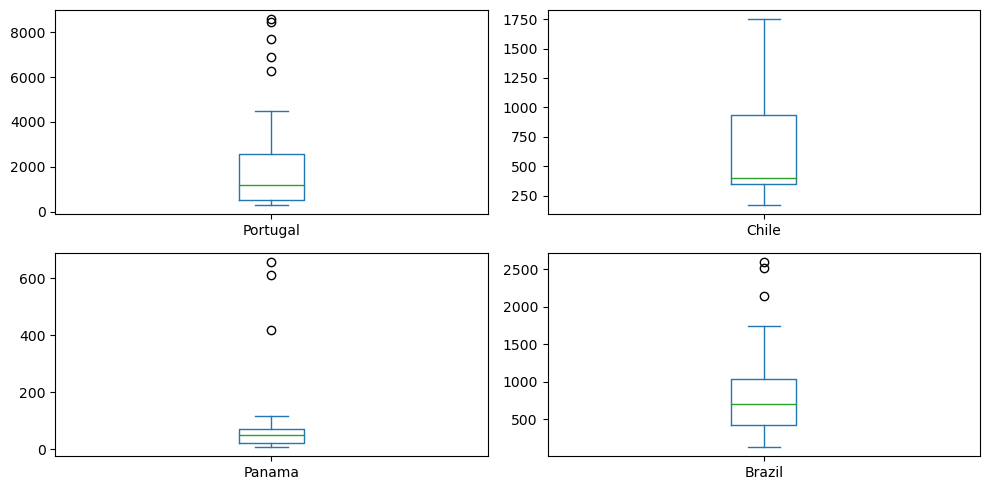

In [210]:
fig = plt.figure(figsize=(10,5))
ax0 = fig.add_subplot(2,2,1)
ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3 = fig.add_subplot(2,2,4)

df_subplot[df_subplot.index == 'Portugal'].transpose().plot(kind='box', ax=ax0)
df_subplot[df_subplot.index == 'Chile'].transpose().plot(kind='box', ax=ax1)
df_subplot[df_subplot.index == 'Panama'].transpose().plot(kind='box', ax=ax2)
df_subplot[df_subplot.index == 'Brazil'].transpose().plot(kind='box', ax=ax3)

plt.tight_layout()

plt.show()

**Question:** Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [211]:
df_top15 = df.copy()

df_top15.drop(columns=['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'],inplace=True)

df_top15['Total'] = df_top15.sum(numeric_only=True, axis=1)
df_top15['Total_1980s'] = df_top15.loc[:,1980:1989].sum(axis=1)
df_top15['Total_1990s'] = df_top15.loc[:,1990:1999].sum(axis=1)
df_top15['Total_2000s'] = df_top15.loc[:,2000:2013].sum(axis=1)

df_top15_aux = df_top15[['OdName','Total','Total_1980s','Total_1990s','Total_2000s']]
df_top15_aux.set_index('OdName',inplace=True)
df_top15_aux = df_top15_aux.sort_values(by='Total',ascending=False).head(15).transpose()

df_top15_aux = df_top15_aux[df_top15_aux.index != 'Total']

df_top15_aux


OdName,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,Lebanon,France,Jamaica,Viet Nam,Romania
Total_1980s,82154,32003,179171,60764,10591,76824,21477,14796,16259,57602,24918,17137,34328,30638,7613
Total_1990s,180395,161528,261966,138482,65302,56915,54871,70421,38189,64864,49245,30028,40329,37726,33659
Total_2000s,429355,466431,110363,312145,165707,107383,99575,63141,88133,16775,41196,61926,31774,28782,52313


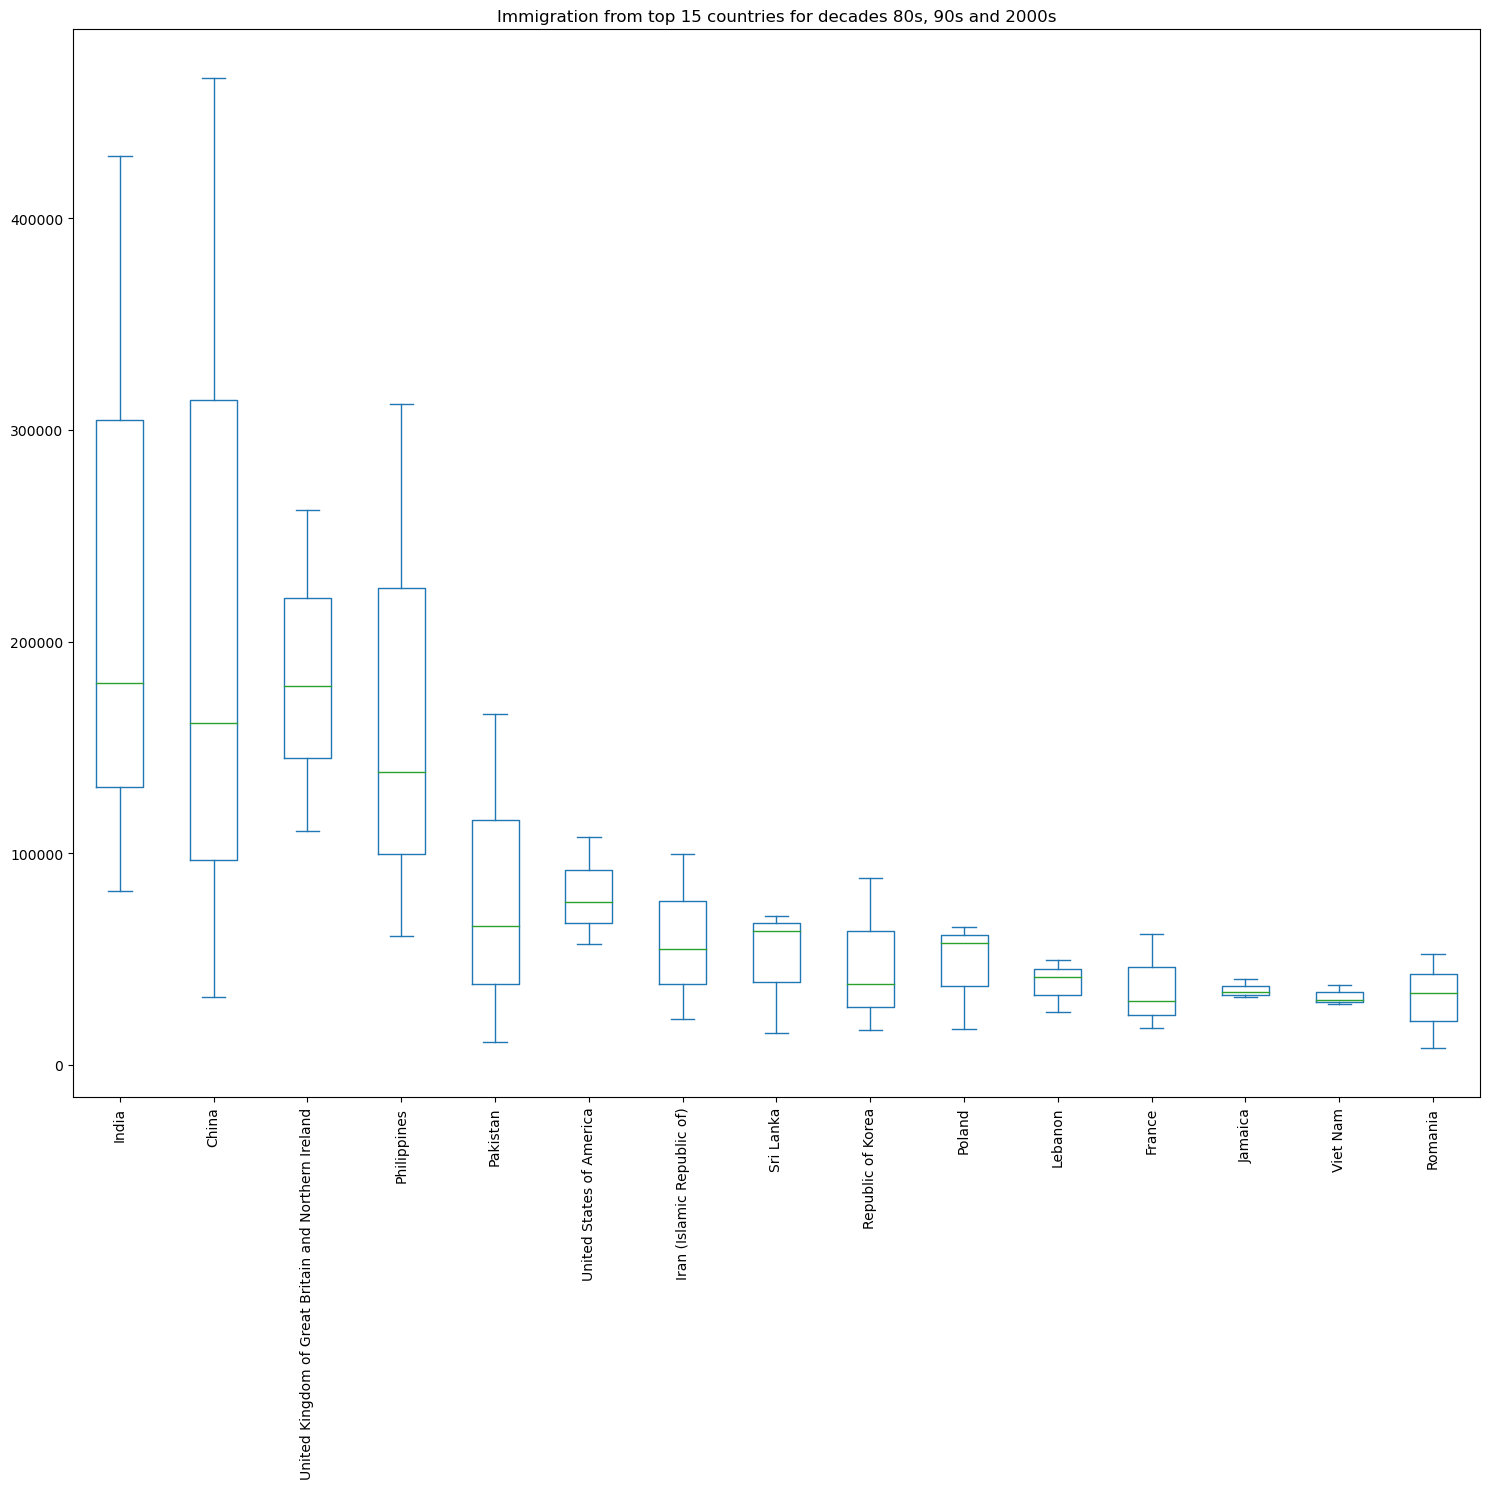

In [212]:
df_top15_aux.plot(kind='box',rot=90, figsize=(15,15))
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.tight_layout()
plt.show()

In [213]:
df_top15_aux.describe()

OdName,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,Lebanon,France,Jamaica,Viet Nam,Romania
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
mean,230634.666667,219987.333333,183833.333333,170463.666667,80533.333333,80374.000000,58641.000000,49452.666667,47527.000000,46413.666667,38453.000000,36363.666667,35477.000000,32382.000000,31195.000000
std,178969.694866,223035.965791,75908.961370,128705.951853,78671.713470,25420.594623,39185.253298,30233.474963,36835.670918,25923.388712,12393.295324,23056.867401,4391.714585,4720.162709,22451.636288
min,82154.000000,32003.000000,110363.000000,60764.000000,10591.000000,56915.000000,21477.000000,14796.000000,16259.000000,16775.000000,24918.000000,17137.000000,31774.000000,28782.000000,7613.000000
25%,131274.500000,96765.500000,144767.000000,99623.000000,37946.500000,66869.500000,38174.000000,38968.500000,27224.000000,37188.500000,33057.000000,23582.500000,33051.000000,29710.000000,20636.000000
50%,180395.000000,161528.000000,179171.000000,138482.000000,65302.000000,76824.000000,54871.000000,63141.000000,38189.000000,57602.000000,41196.000000,30028.000000,34328.000000,30638.000000,33659.000000
75%,304875.000000,313979.500000,220568.500000,225313.500000,115504.500000,92103.500000,77223.000000,66781.000000,63161.000000,61233.000000,45220.500000,45977.000000,37328.500000,34182.000000,42986.000000
max,429355.000000,466431.000000,261966.000000,312145.000000,165707.000000,107383.000000,99575.000000,70421.000000,88133.000000,64864.000000,49245.000000,61926.000000,40329.000000,37726.000000,52313.000000


### Scatter Plots

In [214]:
df_scatter = df.copy()

df_scatter.drop(columns=['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'],inplace=True)

df_scatter = df_scatter.melt(id_vars='OdName',var_name='Years')

df_scatter_aux = df_scatter.groupby(['Years'])['value'].sum().to_frame().reset_index()

df_scatter_aux.head()

,Years,value
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


<Axes: xlabel='Years', ylabel='value'>

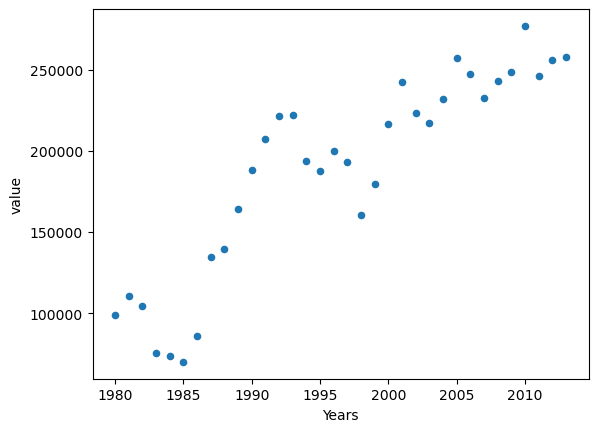

In [215]:
df_scatter_aux.plot(kind='scatter',x='Years',y='value')

Text(0.05, 0.95, 'y = 5567.09x + -10926195.25')

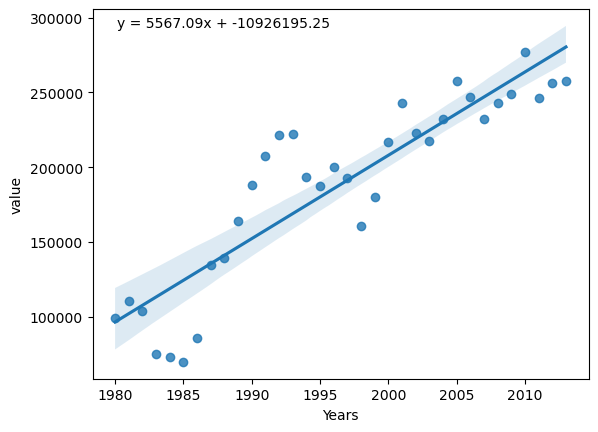

In [216]:
import seaborn as sns

# compute sum of 'value' column
df_sum = df_scatter_aux.groupby(['Years'], as_index=False)['value'].sum()

# create scatter plot with linear regression line
ax = sns.regplot(x='Years', y='value', data=df_sum)

# add linear regression formula to plot
slope, intercept = np.polyfit(df_sum['Years'], df_sum['value'], 1)
ax.annotate(f'y = {slope:.2f}x + {intercept:.2f}', xy=(0.05, 0.95), xycoords='axes fraction')


**Question**: Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?


In [217]:
df_scatter_new = df.copy()

df_scatter_new.drop(columns=['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'],inplace=True)

df_scatter_new = df_scatter_new.melt(id_vars='OdName',var_name='Years')

df_scatter_new_aux = df_scatter_new[df_scatter_new['OdName'].isin(['Denmark','Norway','Sweden'])].groupby(['Years'])['value'].sum().to_frame().reset_index()

df_scatter_new_aux.head()

,Years,value
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


<Axes: xlabel='Years', ylabel='value'>

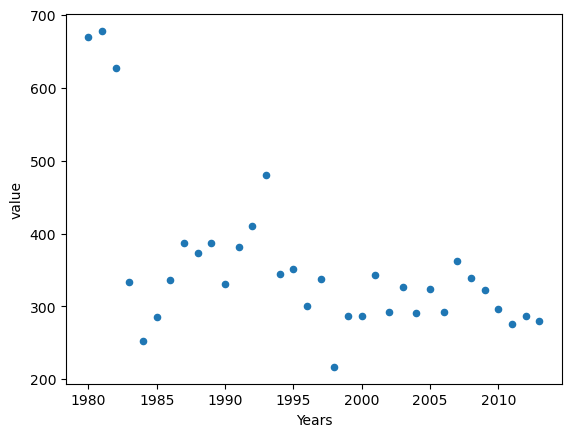

In [218]:
df_scatter_new_aux.plot(kind='scatter',x='Years',y='value')

### Bubble Plots

In [219]:
df_bubble = df.copy()

df_bubble.drop(columns=['Type','Coverage','AREA','AreaName','REG','RegName','DEV','DevName'],inplace=True)

df_bubble.set_index('OdName', inplace=True)

df_bubble_aux = df_bubble[df_bubble.index.isin(['Brazil','Argentina'])].transpose()

df_bubble_aux.reset_index(inplace=True)

df_bubble_aux.rename(columns={'index':'Year'},inplace=True)

df_bubble_aux.head()


OdName,Year,Argentina,Brazil
0,1980,368,211
1,1981,426,220
2,1982,626,192
3,1983,241,139
4,1984,237,145


In [220]:
def normalize(df):
    return (df-df.min()/df.max()-df.min())

df_bubble_aux['normalized_br'] = normalize(df_bubble_aux['Brazil'])

df_bubble_aux['normalized_ar'] = normalize(df_bubble_aux['Argentina'])

df_bubble_aux.rename(columns={'OdName':'Year'}, inplace=True)


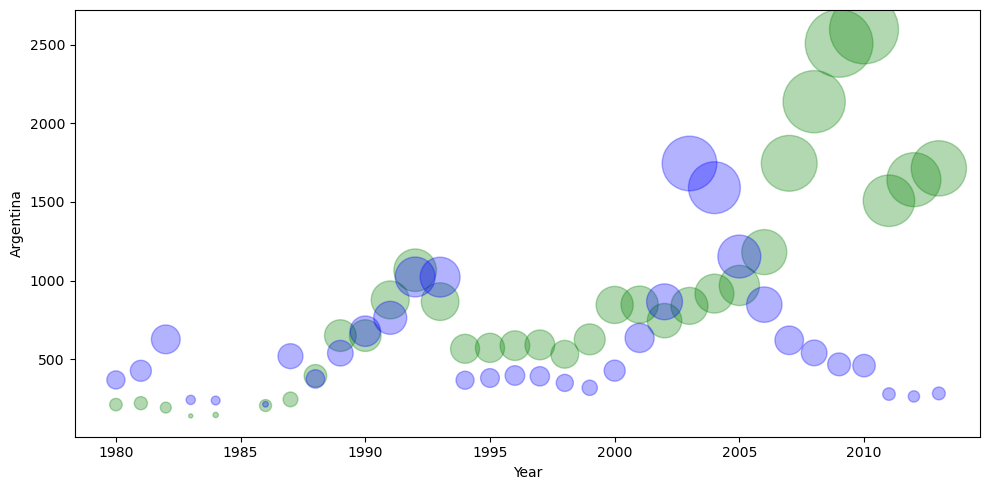

In [223]:
fig = plt.figure(figsize=(10,5))

ax0 = fig.add_subplot(1,1,1)

df_bubble_aux.plot(kind='scatter',color='green', alpha=0.3, x='Year',y='Brazil', s=df_bubble_aux['normalized_br'] ,ax=ax0)

df_bubble_aux.plot(kind='scatter',color='blue', alpha=0.3, x='Year',y='Argentina',s=df_bubble_aux['normalized_ar'] ,ax=ax0)

plt.tight_layout()

plt.show()